# dataset
* https://www.kaggle.com/uciml/pima-indians-diabetes-database
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# Library Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

# Dataset Load

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 수치형 변수를 범주형 변수로 만들기

In [4]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies_high','Pregnancies']]

,Pregnancies_high,Pregnancies
0,False,6
1,False,1
2,True,8
3,False,1
4,False,0
...,...,...
763,True,10
764,False,2
765,False,5
766,False,1


In [5]:
# One-Hot-Encoding
# 여기선 수치 -> 범주 -> 수치로 변환
# 보통은 범주 -> 수치로 많이 사용
df['Age_low'] = df['Age'] < 30
df['Age_middle'] = (df['Age'] >= 30) & (df['Age'] <= 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot: xlabel='Age_high', ylabel='count'>

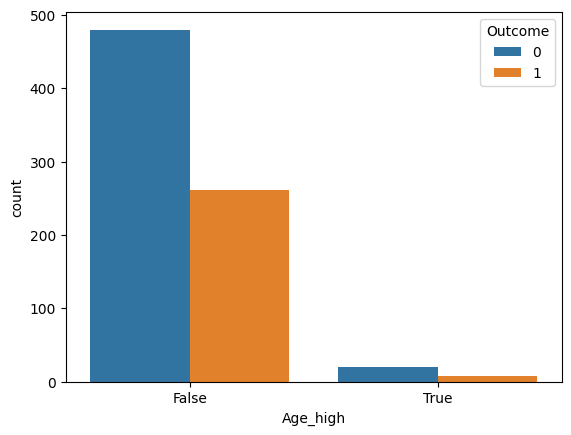

In [6]:
sns.countplot(data=df, x='Age_high', hue='Outcome')

# 결측치 다루기

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']]

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0
...,...,...
763,180,180.0
764,0,NaN
765,112,112.0
766,0,NaN


In [10]:
df['Insulin_nan'].isnull().sum()

374

In [11]:
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [12]:
# 결측치 처리전과 결측치 처리후 데이터를 비교
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean','median'])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [13]:
# 결측치 채우기
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 169.5

# 왜도, 첨도

<AxesSubplot: xlabel='Insulin', ylabel='Density'>

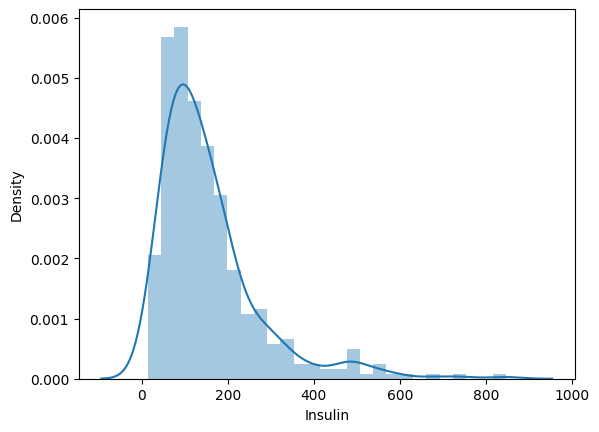

In [14]:
sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])

<AxesSubplot: xlabel='Insulin', ylabel='Density'>

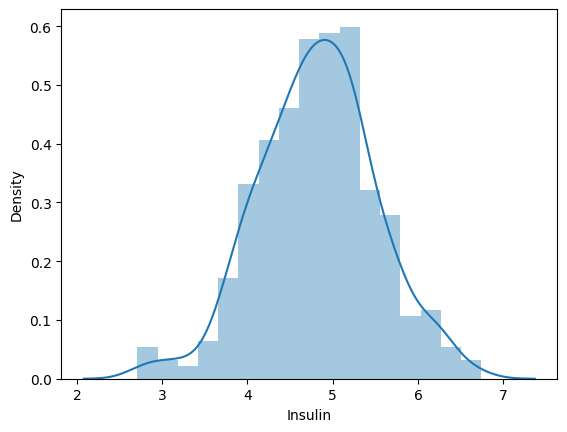

In [15]:
# 로그변환으로 정규분포 생성
sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1))

<AxesSubplot: xlabel='Insulin_nan', ylabel='Density'>

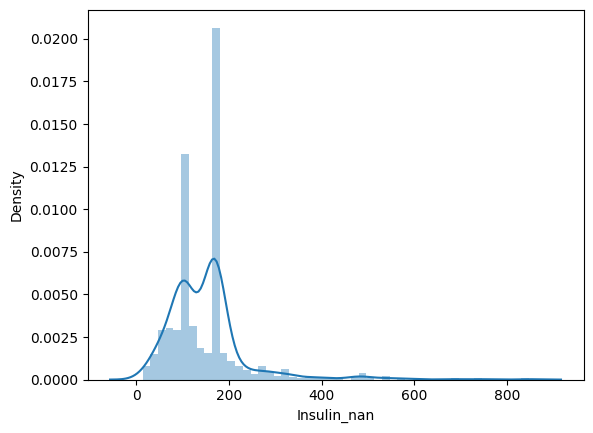

In [16]:
sns.distplot(df['Insulin_nan'])

<AxesSubplot: xlabel='Insulin_log', ylabel='Density'>

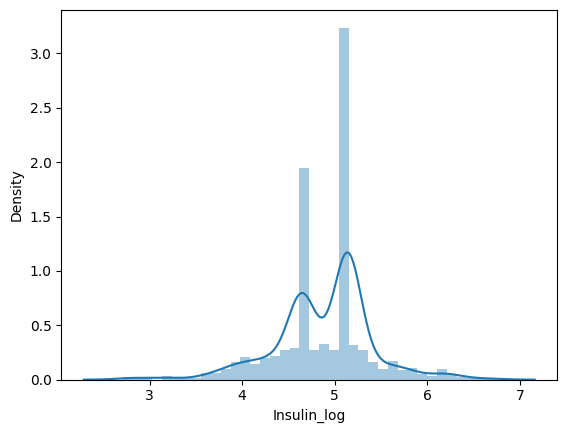

In [17]:
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1)
sns.distplot(df['Insulin_log'])

# 학습, 예측 데이터셋 나누기

In [18]:
# split_count 변수에 담기, 8:2 비율로 구분
split_count = int(df.shape[0] * 0.8)
split_count

614

In [19]:
# train, test 슬라이싱을 통해 데이터를 나누기
train = df[:split_count].copy()
print(train.shape)
test = df[split_count:].copy()
print(test.shape)

(614, 15)
(154, 15)


# 학습과 예측에 사용할 컬럼

In [20]:
# feature_names 라는 변수에 학습에 사용할 컬럼명을 가져오기
feature_names = train.columns.tolist() # 맨 마지막 컬럼만 제외하기 위해
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_log']

In [21]:
# label_name 이라는 변수에 예측할 컬럼을 담기
# print(type(train.columns[-1:]))
# print(type(train.columns[-1]))

label_name = 'Outcome'
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [22]:
# 학습(문제) 세트 만들기
X_train = train[feature_names]
print(X_train.shape)
X_train.head()
# 행렬로 되어있다.

(614, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
0,148,72,35,33.6,0.627,50,False,4.639572
1,85,66,29,26.6,0.351,31,False,5.138735
2,183,64,0,23.3,0.672,32,True,4.639572
3,89,66,23,28.1,0.167,21,False,4.553877
4,137,40,35,43.1,2.288,33,False,5.129899


In [23]:
# 정답 값 만들기
y_train = train[label_name]
print(y_train.shape)
y_train.head()

# 벡터로 되어있다.

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
# 예측(실전)에 사용할 데이터 셋
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_log
614,138,74,26,36.1,0.557,50,True,4.976734
615,106,72,0,25.8,0.207,27,False,5.138735
616,117,96,0,28.7,0.157,30,False,5.138735
617,68,62,13,20.1,0.257,23,False,2.772589
618,112,82,24,28.2,1.282,50,True,4.639572


In [25]:
# 성능측정 - 예측의 정답값을 확인해보기, 현실에서는 모르는 경우가 대다수임
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# ML 알고리즘 가져오기

In [26]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

# 학습(훈련)
* 기출문제(X_train)와 정답(y_train)을 보고 공부하는 것과 유사하다

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측
* 실제시험(X_test), 정답을 예측해보기

In [28]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

# 트리 알고리즘 분석
* 의사결정나무를 시각화

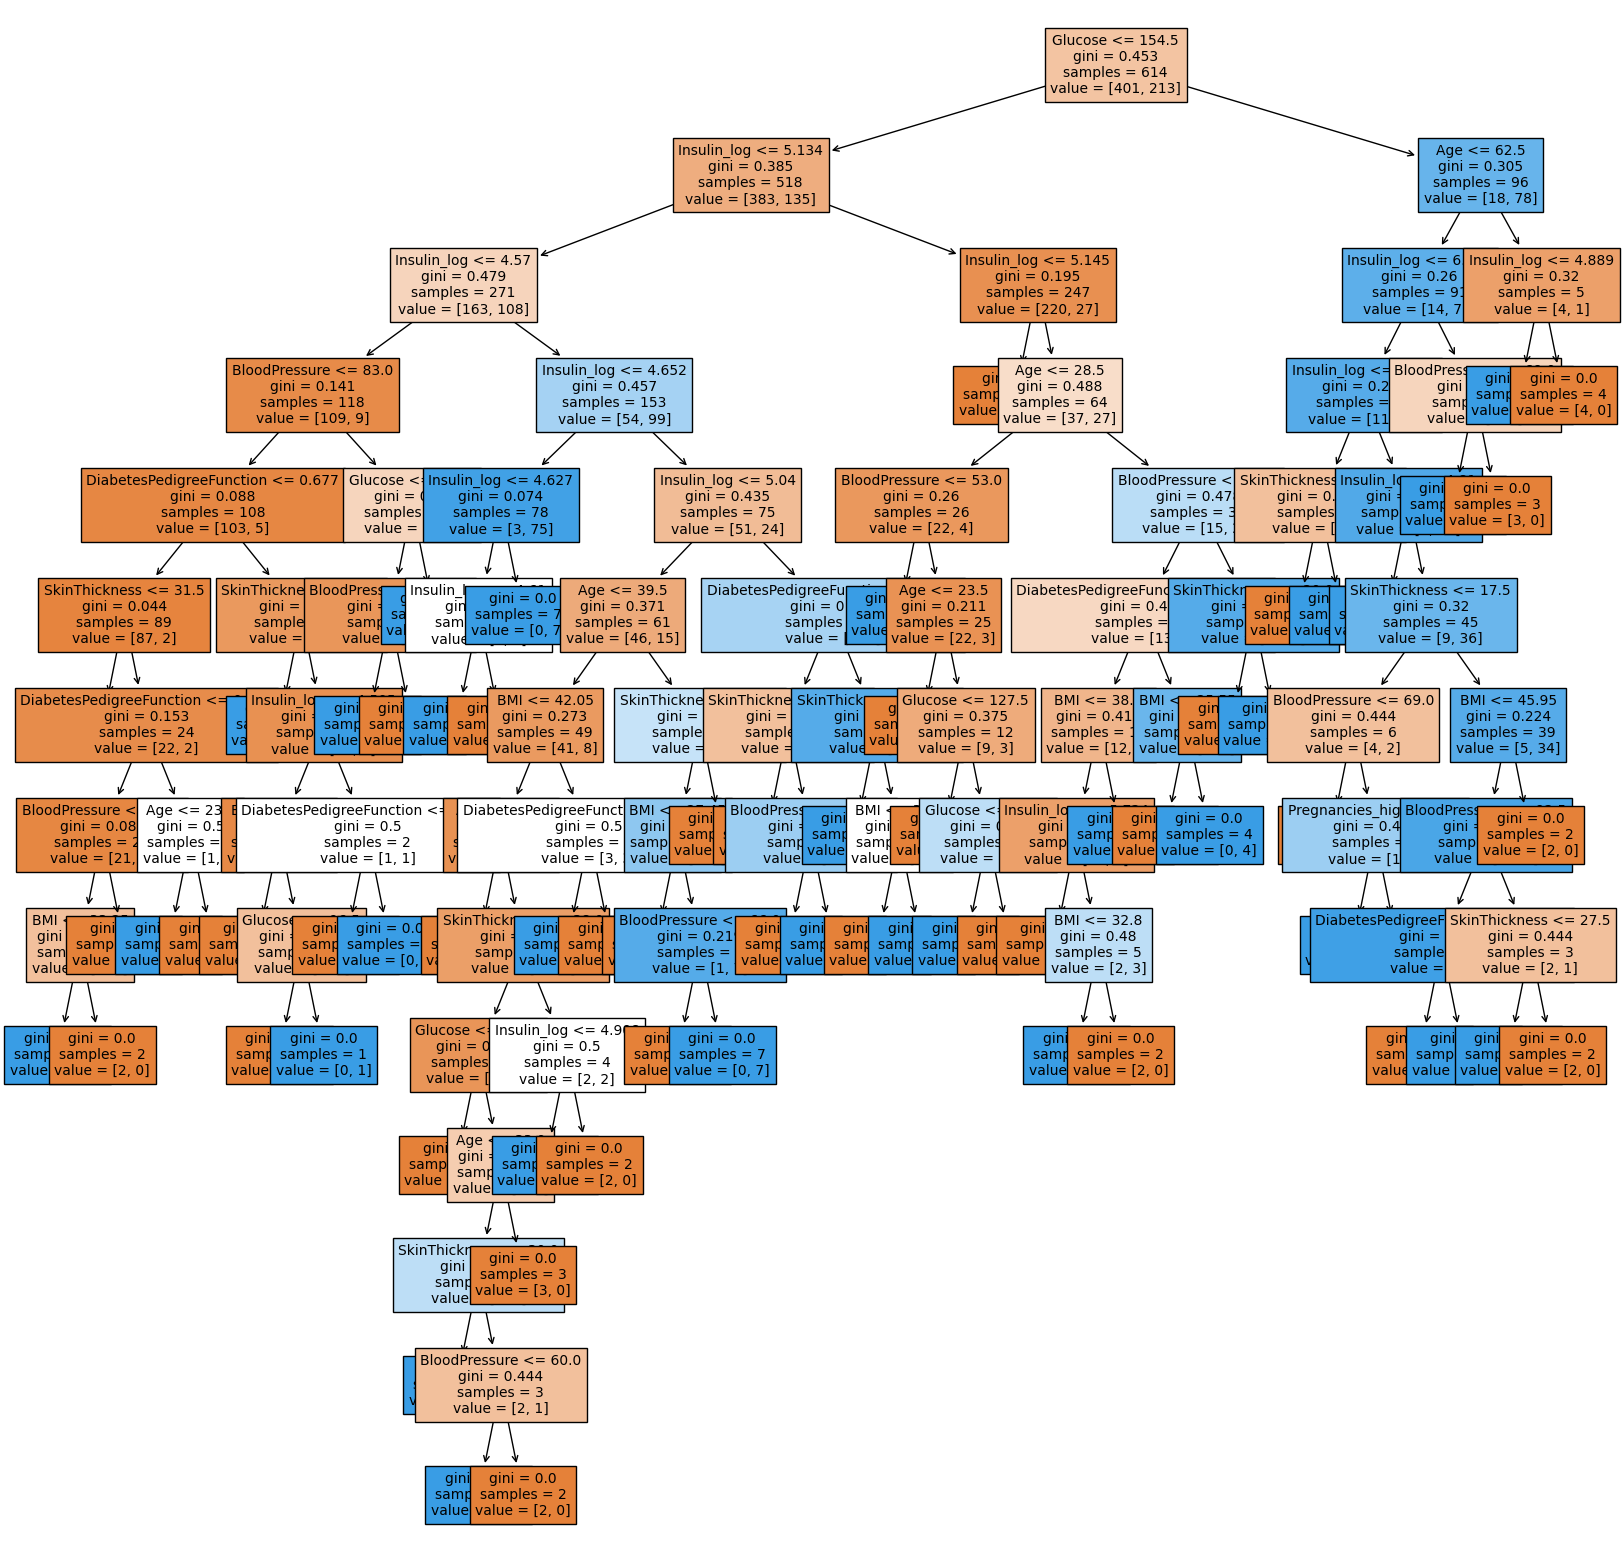

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                filled=True, fontsize=10)


In [30]:
# graphviz
# import graphviz
# from sklearn.tree import export_graphviz
# dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
# graphviz.Source(dot_tree)

In [31]:
# 피처의 중요도를 추출
model.feature_importances_

array([0.21452908, 0.07361088, 0.05966903, 0.05872658, 0.04048078,
       0.0630493 , 0.0047924 , 0.48514196])

<AxesSubplot: >

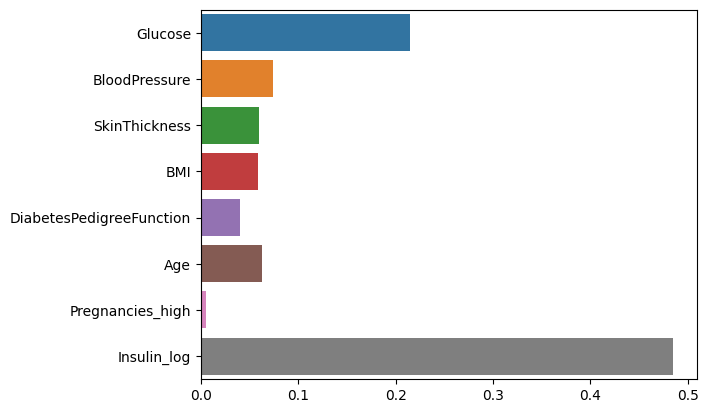

In [32]:
# 피처의 중요도를 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도 측정

In [33]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나온다
# 여기에서 절대값을 씌운 값이 1이면 값이 다르게 예측한 값이 나온다.
# abs(y_test - y_predict).sum() / len(y_test)
# 44 -> 39 -> 49(나이25세) -> 55(나이30세) -> 23(인슐린 결측치 평균대체) -> 23(인슐린 결측치 중앙값대체)
diff_count = abs(y_test - y_predict).sum()
diff_count


20

In [34]:
# 예측의 정확도 계산, 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됨
(len(y_test) - diff_count) / len(y_test) * 100

87.01298701298701

In [35]:
# 직접 계산할 수도 있지만, 미리 구현된 알고리즘을 사용할 수 있다.
# accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

87.01298701298701

In [36]:
# model 의 score로 점수를 계산
model.score(X_test, y_test) * 100

87.01298701298701